In [1]:
# COVID-19 Global Data Tracker Project

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure default style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 2. Load the COVID-19 Dataset from Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# 3. View the structure
print("Shape of dataset:", df.shape)
df.head()


Matplotlib is building the font cache; this may take a moment.


Shape of dataset: (429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [2]:
# 4. Basic Data Cleaning

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter out rows with no location (if any)
df = df[df['location'].notnull()]

# Focus on relevant columns for analysis
columns_of_interest = [
    'location', 'date', 'total_cases', 'new_cases',
    'total_deaths', 'new_deaths',
    'people_vaccinated', 'people_vaccinated_per_hundred',
    'total_vaccinations'
]
df = df[columns_of_interest]

# Drop rows with missing 'total_cases' or 'total_deaths'
df = df.dropna(subset=['total_cases', 'total_deaths'])

# Show cleaned structure
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 411804 entries, 0 to 429434
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   location                       411804 non-null  object        
 1   date                           411804 non-null  datetime64[ns]
 2   total_cases                    411804 non-null  float64       
 3   new_cases                      410159 non-null  float64       
 4   total_deaths                   411804 non-null  float64       
 5   new_deaths                     410608 non-null  float64       
 6   people_vaccinated              69585 non-null   float64       
 7   people_vaccinated_per_hundred  69585 non-null   float64       
 8   total_vaccinations             73542 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 31.4+ MB


In [3]:
# 5. Focus on Selected Countries for Comparison

selected_countries = ['Kenya', 'India', 'United States', 'Brazil', 'United Kingdom']
df_selected = df[df['location'].isin(selected_countries)]

# Confirm available data
df_selected['location'].value_counts()


location
Brazil            1674
India             1674
Kenya             1674
United Kingdom    1674
United States     1674
Name: count, dtype: int64

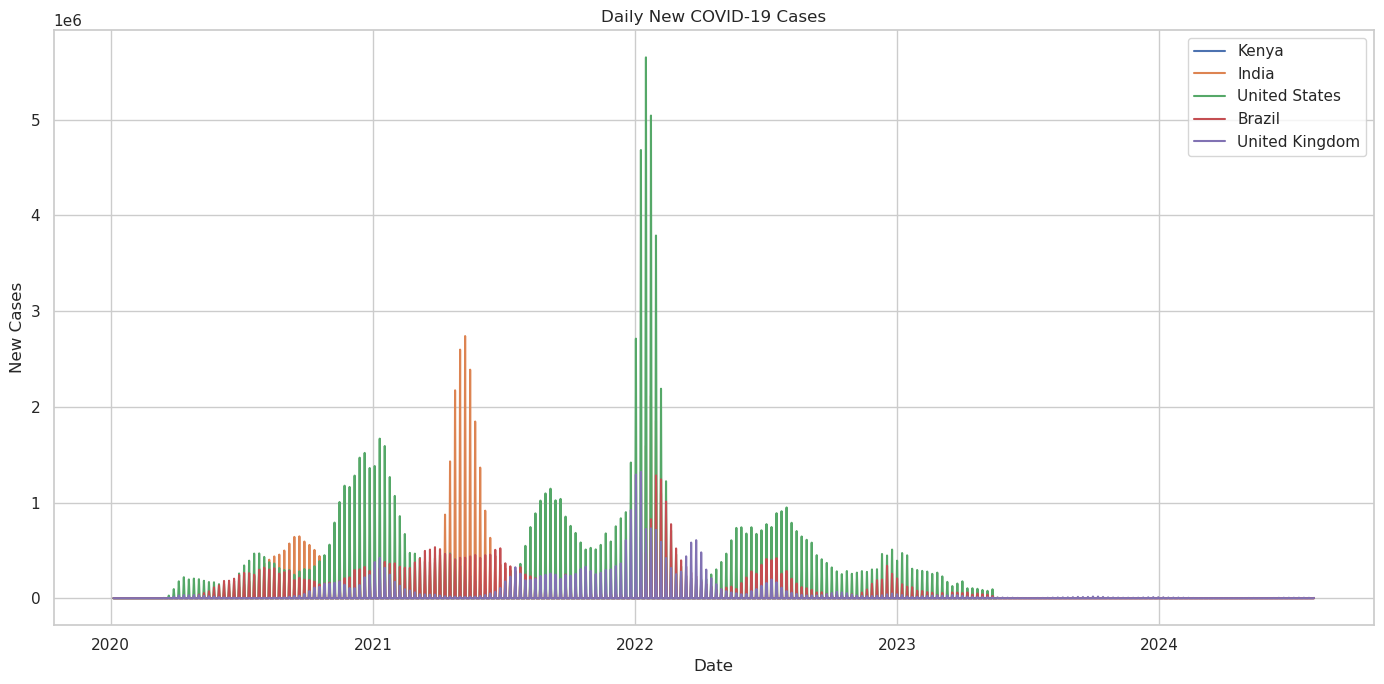

In [4]:
# 6. Plot: Daily New Cases

plt.figure(figsize=(14, 7))
for country in selected_countries:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()


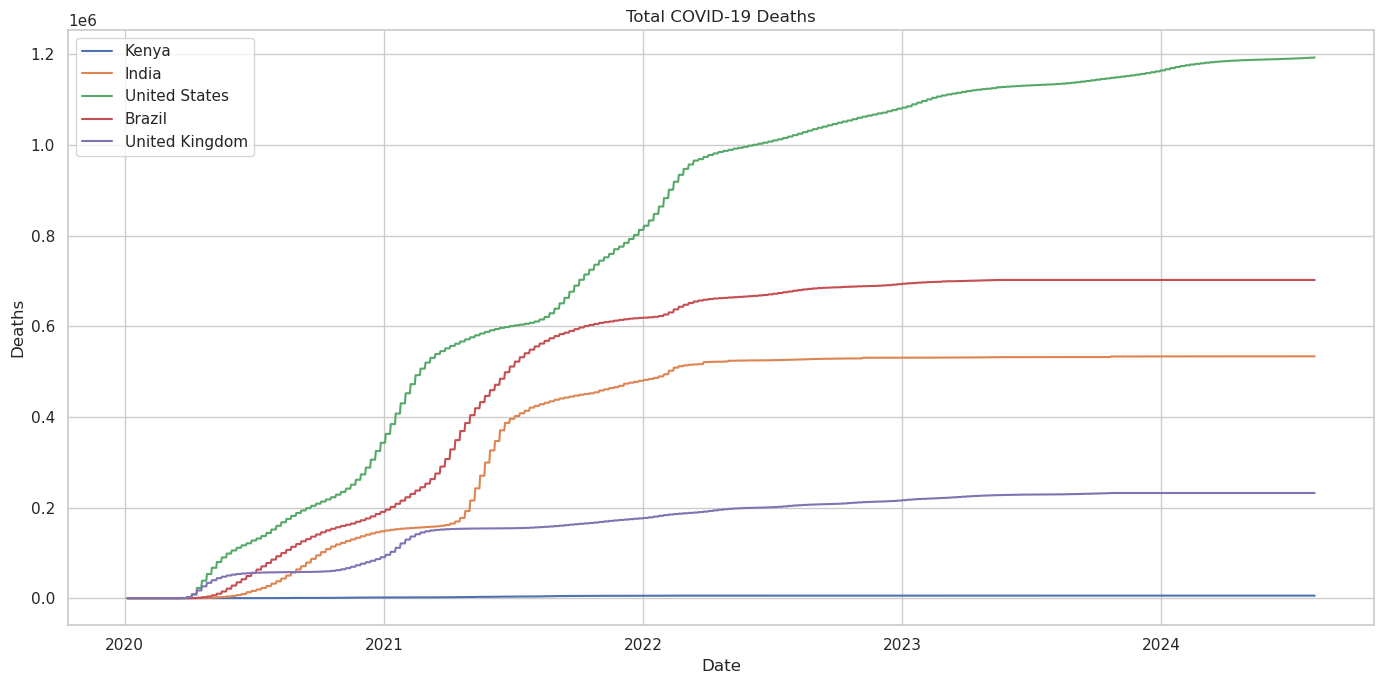

In [5]:
# 7. Plot: Total Deaths

plt.figure(figsize=(14, 7))
for country in selected_countries:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.tight_layout()
plt.show()


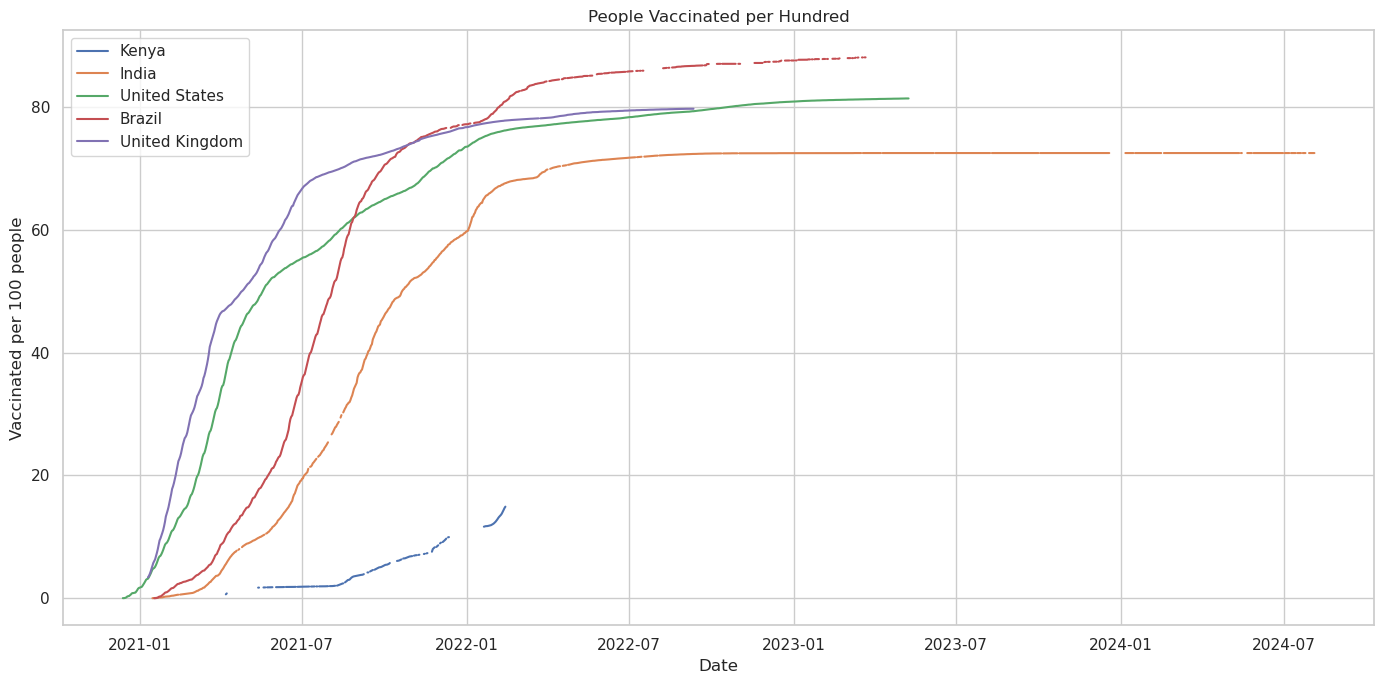

In [6]:
# 8. Plot: People Vaccinated per Hundred

plt.figure(figsize=(14, 7))
for country in selected_countries:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated_per_hundred'], label=country)

plt.title("People Vaccinated per Hundred")
plt.xlabel("Date")
plt.ylabel("Vaccinated per 100 people")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# 9. Summary: Latest Statistics

# Get the latest available date
latest_date = df_selected['date'].max()
latest_stats = df_selected[df_selected['date'] == latest_date]

# Display summary
summary = latest_stats[['location', 'total_cases', 'total_deaths', 'total_vaccinations']]
summary.set_index('location', inplace=True)
summary.sort_values(by='total_cases', ascending=False)


,total_cases,total_deaths,total_vaccinations
location,,,
United States,103436829.0,1193165.0,NaN
India,45041748.0,533623.0,2.206868e+09
Brazil,37511921.0,702116.0,NaN
United Kingdom,24974629.0,232112.0,NaN
Kenya,344106.0,5689.0,NaN
